<a href="https://colab.research.google.com/github/AhmadSulton666/Fake-News-Detection/blob/main/Fake_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/drive')
fakeNews = '/drive/MyDrive/ml_quiz/fakeNews.csv'
fake = pd.read_csv(fakeNews)

drive.mount('/drive')
trueNews = '/drive/MyDrive/ml_quiz/trueNews.csv'
true = pd.read_csv(trueNews)

Mounted at /drive
Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


<ipython-input-2-2bf9170391a3>:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  control = pd.read_csv(fileControl)


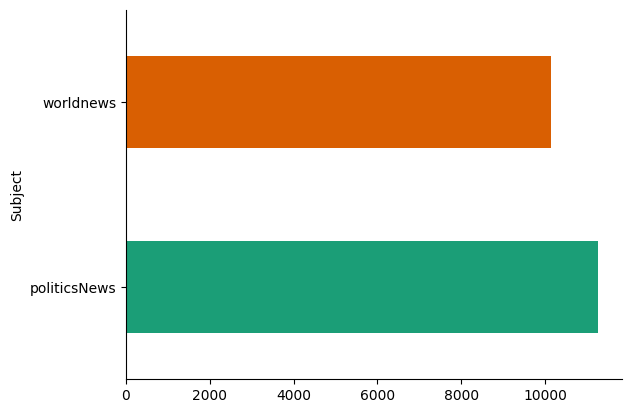

In [ ]:
trueNews.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Subject')
plt.show()

In [ ]:
import missingno as msno
msno.matrix(fakeNews.sample(20000))
msno.matrix(trueNews.sample(20000))
misVal = fakeNews.isnull().sum()*100/len(fakeNews)
print(misVal)
misVal_true = trueNews.isnull().sum()*100/len(trueNews)
print(misVal_true)

NameError: name 'fakeNews' is not defined

23481
(23481, 4)
21417
(21417, 4)


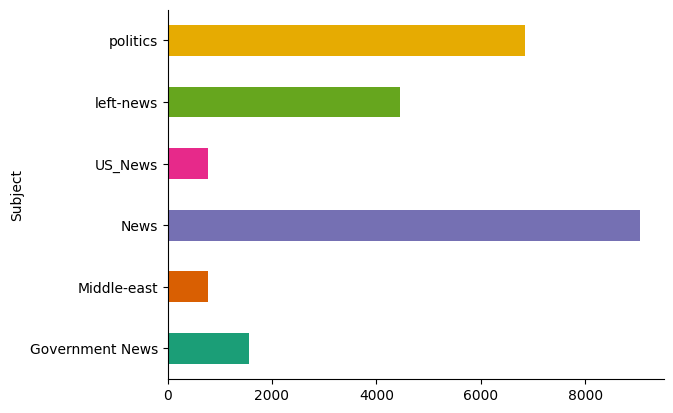

In [ ]:
print(len(fakeNews))
print(fakeNews.shape)
print(len(trueNews))
print(trueNews.shape)

fakeNews.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Subject')
plt.show()

In [ ]:
# Pemrosesan Awal Data

trueNews.shape

NameError: name 'trueNews' is not defined

In [ ]:
fakeNews.shape

(23481, 4)

In [ ]:
trueNews['target'] = 1
fakeNews['target'] = 0

In [ ]:
df = pd.concat([fakeNews, trueNews])
df.columns

data = df.drop(['title', 'subject', 'date'], axis=1)
data
data = data.sample(frac = 1)
data.head()

data.reset_index(inplace=True)
data.drop(['index'], axis=1, inplace=True)

data.columns

NameError: name 'pd' is not defined

In [ ]:
data.shape

(44898, 2)

In [ ]:
import re
import string

def optional(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('\W', " ", text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

In [ ]:
data = data.dropna(subset=['text', 'target'])

In [ ]:
# Pemodelan
from sklearn.model_selection import train_test_split

# data['text'] = data['text'].apply(optional)

x = data['text'].apply(optional)
y = data['target']

# error
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()
X_train = vector.fit_transform(x_train)
X_test = vector.transform(x_test)

In [ ]:
# Model pelatihan menggunakan DecisionTreeClasifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
prediction = dt.predict(X_test)

In [ ]:
dt.score(X_test, y_test)

0.9951893095768374

In [ ]:
# Hasil

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5901
           1       1.00      0.99      0.99      5324

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

0.9951893095768374
